In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import sympy

In [2]:
x = np.linspace(-5, 2, 100)
y1 = x**3+5*(x**2)+10
y2 = 3*(x**2)+10*x
y3 = 6*x+10

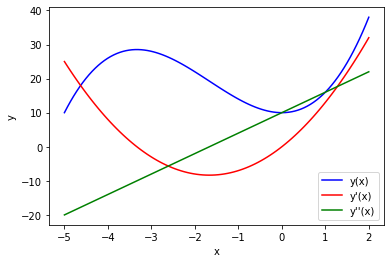

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y1, color='blue', label='y(x)')
ax.plot(x, y2, color='red', label='y\'(x)')
ax.plot(x, y3, color='green', label='y\'\'(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

Text(0, 0.5, 'y')

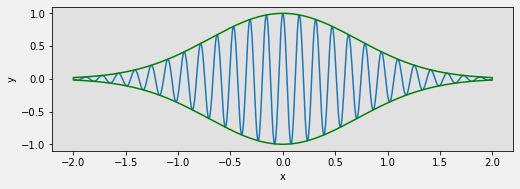

In [4]:
fig = plt.figure(figsize=(8, 2.5), facecolor='#f1f1f1')
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor='#e1e1e1')
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40*x)
y2 = np.exp(-x**2)
ax.plot(x, y1*y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [5]:
fig.savefig('graph.png', dpi=100, facecolor='#f1f1f1')

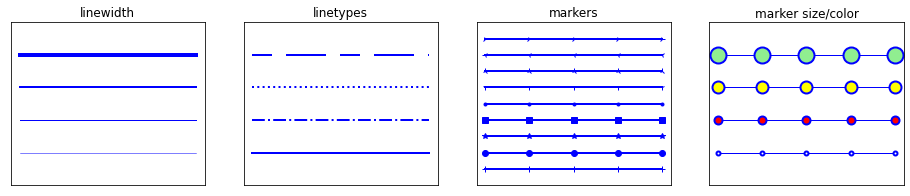

In [46]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y+n, color='blue', linewidth=linewidth)
axes_settings(fig, axes[0], 'linewidth', len(linewidths))
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y+n, color='blue', lw=2, linestyle=linestyle)
line, = axes[1].plot(x, y+3, color='blue', lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], 'linetypes', len(linestyles)+1)
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    axes[2].plot(x, y+n, color='blue', lw=2, ls='-', marker=marker)
axes_settings(fig, axes[2], 'markers', len(markers))
markersizecolors = [(4, 'white'), (8, 'red'), (12, 'yellow'), (16, 'lightgreen')]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y+n, color='blue', lw=1, ls='-', marker='o', markersize=markersize,
                 markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], 'marker size/color', len(markersizecolors))

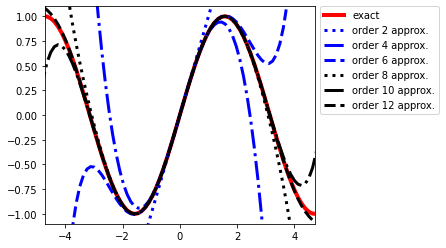

In [49]:
sym_x = sympy.Symbol('x')
x = np.linspace(-2*np.pi, 2*np.pi, 100)
def sin_expansion(x, n):
    """
    Evaluate the nth order Taylor series expansion
    of sin(x) for the numerical values in the array x.
    """
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linewidth=4, color='red', label='exact')
colors = ['blue', 'black']
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx//3], linestyle=linestyles[idx%3],
            linewidth=3, label='order %d approx.'%(n+1))
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=0.75)